# Data Import

[Word2Vec](https://pathmind.com/wiki/word2vec)

[More Word2Vec](https://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.XrtY6xNKiRs)

# Load in datasets

In [316]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt

In [30]:


cali = pd.read_csv('../data/scrape_dm_cali.csv')

mich = pd.read_csv('../data/scrape_dm_mich.csv')

ny = pd.read_csv('../data/scrape_dm_ny.csv')

ohio = pd.read_csv('../data/scrape_dm_ohio.csv')

texas = pd.read_csv('../data/scrape_dm_texas.csv')

tweets = pd.concat([cali, mich, ny, ohio, texas])

tweets.head()

,tweet_id,username,text,tweet_date,search_term,city,lat,long,radius,query_start
0,710245730590404608,TTWN SF Bay Area,Power outage in Cupertino #BayArea #Traffic ht...,2016-03-16 23:25:52,power outage,San Jose,37.3323,-121.853394,10mi,2016-01-01
1,708811502241734656,San Jose Now,WEATHER ALERT: Flash flood watch in Bay Area a...,2016-03-13 00:26:45,power outage,San Jose,37.3323,-121.853394,10mi,2016-01-01
2,706856719733776384,San Jose Now,Power outages:30 in San Francisco154 on Penins...,2016-03-07 14:59:09,power outage,San Jose,37.3323,-121.853394,10mi,2016-01-01
3,726876023573204993,San Jose Now,Power outage in Fremont. Several intersections...,2016-05-01 20:48:43,power outage,San Jose,37.3323,-121.853394,10mi,2016-01-01
4,724681945095888897,San Jose Now,"East Bay power outages also affects BART, UC B...",2016-04-25 19:30:14,power outage,San Jose,37.3323,-121.853394,10mi,2016-01-01


## Data Cleaning

In [31]:
tweets.shape

(20100, 10)

In [32]:
tweets.drop_duplicates(inplace=True)

In [33]:
tweets.shape

(16913, 10)

In [34]:
tweets.reset_index(inplace= True)

In [35]:
tweets.isnull().sum()

index          0
tweet_id       0
username       0
text           0
tweet_date     0
search_term    0
city           0
lat            0
long           0
radius         0
query_start    0
dtype: int64

## Function to clean tweets & usernames

In [36]:
def clean_str(string):
    string = string.lower()
    url_pattern = r'((http|ftp|https):\/\/)?[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?'
    string = re.sub(url_pattern, ' ', string)
    string = re.sub(r"\n", "", string)    
    string = re.sub(r"\r", "", string) 
    string = re.sub(r"[0-9]+", "", string)
    string = re.sub(r'[^\w\s]','', string)    
    
    return string.strip()

In [37]:
tweets['text'] = tweets['text'].map(clean_str)
tweets['username'] = tweets['username'].map(clean_str)

In [38]:
# making new column with username + tweet
tweets['name_and_tweet'] = tweets['username'] + " " +tweets['text']

## Word2Vec Stuff

In [39]:
# Import Word2Vec
from gensim.models.word2vec import Word2Vec


In [151]:
# turning cleaned tweets into list of lists

def tweet_to_words(tweets):
    # empty list of tweets
    list_of_tweets = []
    
    # make tweet into list of words
    for tweet in tweets:
        tweet = tweet.split()
    
        # list of stop words
        stops = ['los','angeles','san','diego','jose','columbus','cleveland',
             'cincinatti','detroit','ann','arbor','warren','new','york',
             'ny','buffalo','rochester','michigan','california','ohio','texas',
            'st','amc','scott','schudlich','finnished','de','antonio','la','houston',
                 'dallas', 'santa', 'ana', 'clara', 'grand', 'rapids', 'kearny','mesa',
                'peticolas','christmas']
    
        # Remove stopwords.
        meaningful_tweet = [w for w in tweet if not w in stops]
    
        # add tweet to big list
        list_of_tweets.append(meaningful_tweet)

    return list_of_tweets

In [152]:
# making corpus
corpus = tweet_to_words(tweets['name_and_tweet'])

In [153]:

# # Train a model! 
model = Word2Vec(corpus,      # Corpus of data.
                  size=150,    # How many dimensions do you want in your word vector?
                  window=5,    # How many "context words" do you want?
                  min_count=3, # Ignores words below this threshold.
                  sg=1,        # SG = 1 uses SkipGram, SG = 0 uses CBOW (default).
                  workers=4)   # Number of "worker threads" to use (parallelizes process).

# # Do what you'd like to do with your data!
# model.most_similar("car")

## Testing out words

In [99]:
model.most_similar('dte')

/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('aep', 0.9570109844207764),
 ('currently', 0.9534438848495483),
 ('reported', 0.9530239105224609),
 ('update', 0.9519146680831909),
 ('widespread', 0.950791597366333),
 ('wind', 0.9502784013748169),
 ('planned', 0.9488312602043152),
 ('experiencing', 0.9479764699935913),
 ('affecting', 0.9418179392814636),
 ('news', 0.9389858841896057)]

In [154]:
model.most_similar('outages')

/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('customers', 0.8135694861412048),
 ('restoration', 0.7925965189933777),
 ('without', 0.788556694984436),
 ('outage', 0.7836710810661316),
 ('affected', 0.7732450366020203),
 ('update', 0.7657163143157959),
 ('crews', 0.7627595067024231),
 ('areas', 0.7591037750244141),
 ('restore', 0.7575193047523499),
 ('updates', 0.7553784847259521)]

In [160]:
model.most_similar('interruption')

/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('service', 0.9441245794296265),
 ('information', 0.9268373250961304),
 ('electricity', 0.9248515367507935),
 ('centerpoint', 0.9238839149475098),
 ('consumers', 0.9225161671638489),
 ('report', 0.9220605492591858),
 ('inconvenience', 0.9189209342002869),
 ('customer', 0.9159246683120728),
 ('cps', 0.9132009744644165),
 ('forecast', 0.9091302156448364)]

## Code to check for words in tweets

In [221]:
for tweet in tweets['name_and_tweet']:
    if 'nationalgrid' in tweet:
        print(tweet)

josué pierre if kevin parker wants us to believe hes not on the side of national grid and for regular brooklynites like you and me he needs to return the  given by the nationalgrid voluntary pac and  from independent power producers of new york ippny money immediately
christoph knudsen nationalgridus horrendous customer service from national grid who called me exactly once in the briefest moment i was away from my phone during my hour appointment windowi was outside calling back  mins after missed call gone and wouldnt be making a nd attempt today
emily smaldino for realtime power outage information  online outage reporting   indepth storm safety tips visit the nationalgridus outage central site
mark poloncarz latest power outage updatenationalgridus is reporting  without power in erie and has recently reported to me it expects complete restoration by noon nyseandg is reporting without power
sarah minkewicz my dad works for nationalgridus and has been up working since    and will be wo

## Words associated with the most common words

In [105]:
model.most_similar('power')

/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('business', 0.8201457262039185),
 ('internet', 0.8165985345840454),
 ('electricity', 0.814180850982666),
 ('cause', 0.8131715655326843),
 ('building', 0.8123186826705933),
 ('towers', 0.8117901086807251),
 ('left', 0.805801272392273),
 ('multiple', 0.8051167130470276),
 ('k', 0.8032269477844238),
 ('block', 0.8025606274604797)]

In [147]:
model.most_similar(positive ='light', negative='light')

/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('say', 0.27668213844299316),
 ('this', 0.27341434359550476),
 ('what', 0.2708932161331177),
 ('whats', 0.2664024829864502),
 ('im', 0.26533204317092896),
 ('hall', 0.2630937695503235),
 ('or', 0.26236265897750854),
 ('go', 0.2571299076080322),
 ('movie', 0.25652045011520386),
 ('call', 0.25565534830093384)]

In [162]:
model.most_similar(negative = 'poweroutage')

/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('their', -0.15730451047420502),
 ('are', -0.16887733340263367),
 ('our', -0.2122805267572403),
 ('has', -0.21275129914283752),
 ('your', -0.21671441197395325),
 ('states', -0.21912848949432373),
 ('who', -0.22259311378002167),
 ('of', -0.22326290607452393),
 ('customers', -0.22353070974349976),
 ('vote', -0.22732646763324738)]

In [177]:
model.most_similar(positive = 'poweroutage', negative= 'poweroutage')

/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('massive', 0.15457022190093994),
 ('or', 0.15294699370861053),
 ('major', 0.1520165055990219),
 ('parts', 0.14867782592773438),
 ('by', 0.14253634214401245),
 ('metro', 0.14215369522571564),
 ('that', 0.13888679444789886),
 ('south', 0.13774588704109192),
 ('any', 0.13749615848064423),
 ('widespread', 0.13435782492160797)]

In [178]:
model.most_similar(negative = 'service', positive= 'service')

/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('can', 0.18247757852077484),
 ('j', 0.15669091045856476),
 ('its', 0.14508596062660217),
 ('some', 0.1442054957151413),
 ('hall', 0.13173703849315643),
 ('are', 0.13054904341697693),
 ('im', 0.1296537220478058),
 ('do', 0.1272273063659668),
 ('da', 0.12307941913604736),
 ('cannot', 0.12209022045135498)]

In [179]:
model.most_similar(negative = 'interruption',positive = 'interruption')

/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('electric', 0.09509434551000595),
 ('martin', 0.055878713726997375),
 ('darkness', 0.05486219748854637),
 ('so', 0.05294876918196678),
 ('luther', 0.050982534885406494),
 ('power', 0.049686796963214874),
 ('great', 0.047631800174713135),
 ('sure', 0.046588584780693054),
 ('trump', 0.046476516872644424),
 ('she', 0.0451337955892086)]

In [228]:
model.most_similar(positive = 'grid',negative='grid') #, negative='dukeenergy')

/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('or', 0.27351099252700806),
 ('ever', 0.25272107124328613),
 ('john', 0.24911025166511536),
 ('body', 0.24727512896060944),
 ('myself', 0.2433042824268341),
 ('mr', 0.2419574111700058),
 ('c', 0.24138088524341583),
 ('b', 0.23943538963794708),
 ('u', 0.2393842488527298),
 ('heating', 0.2389916479587555)]

## Words associated with our key search w

In [229]:
# outage outages poweroutage poweroutages interruption service

associated = ['outages', 'poweroutage','outage','poweroutages','area','failure','dte',
              'transformer','caused','update','storm','customers','without','lines',
              'crews','affecting','experiencing','restoration','reports','area','ladwp',
              'clepublicpower','hurricaneseason','dispatching','interruption','report',
              'service','centerpoint','inconvenience','cps','customer','consumers',
              'prevent','conditions','fire','explosion','pole','accident','caused',
              'electricity','grid','information','pge','aep','currently','planned',
              'reported','widespread','wind','updates','estimates','according',
             'utility','areas','sdge','warnings','capacity','thousand','disabled',
              'covid','regional','impacted','resolve','determine','phones','homes',
             'numerous','resume','forecasted','reopen','shutdown','blackout','scheduled',
             'reported','partial','significant','causes','delayed','temporary',
             'unplanned','shortly','utilities','safety','homes','route','businesses',
             'national','pge','coned','rge','dukeenergy','consumersenergy',
              'nationalgrid','wildfires','info','electrical']


In [230]:
# outage outages poweroutage poweroutages interruption service 

non_associated = ['electric','martin','darkness','so','luther','power','great',
                  'sure','trump','she','of','or','by','day','up','if','please',
                  'for','their','your','massive','major','parts','by','metro',
                  'that','south','any','widespread','closet','poshmark','car',
                 'bike','use','phone','guitar','room','off','play','gas','off',
                 'use','out','can','its','some','hall','are','im','do','da','cannot',
                   'cut','own','life','hands','wash','miles','care','family',
                   'had','person','bill','matter','trust','so','give','realdonaldtrump',
                   'absolutely','reason','thats','am','were','be','theyre','youre',
                    'was','traffic','both','link','lightsout','video','song','click',
                    'bio','bubblelife','mothers','center','zoo','day','cuts','an',
                   'festival', 'about','scooter','ready','saw','turn','ford','roberts',
                    'william','mary','discount','code','kick','grab','entire','body',
                   'myself','heating','john']

In [246]:
# code based off of simple_sentiment() from Global Lesson, 5.03 NLP I

def outage_sentiment(tweet):
    
    # associated word list
    associated = ['outages', 'poweroutage','outage','poweroutages','area','failure','dte',
              'transformer','caused','update','storm','customers','without','lines',
              'crews','affecting','experiencing','restoration','reports','area','ladwp',
              'clepublicpower','hurricaneseason','dispatching','interruption','report',
              'service','centerpoint','inconvenience','cps','customer','consumers',
              'prevent','conditions','fire','explosion','pole','accident','caused',
              'electricity','grid','information','pge','aep','currently','planned',
              'reported','widespread','wind','updates','estimates','according',
             'utility','areas','sdge','warnings','capacity','thousand','disabled',
              'covid','regional','impacted','resolve','determine','phones','homes',
             'numerous','resume','forecasted','reopen','shutdown','blackout','scheduled',
             'reported','partial','significant','causes','delayed','temporary',
             'unplanned','shortly','utilities','safety','homes','route','businesses',
             'national','pge','coned','rge','dukeenergy','consumersenergy',
              'nationalgrid','wildfires','info','electrical']
    
    # non-associated word list
    non_associated = ['electric','martin','darkness','so','luther','power','great',
                  'sure','trump','she','of','or','by','day','up','if','please',
                  'for','their','your','massive','major','parts','by','metro',
                  'that','south','any','widespread','closet','poshmark','car',
                 'bike','use','phone','guitar','room','off','play','gas','off',
                 'use','out','can','its','some','hall','are','im','do','da','cannot',
                   'cut','own','life','hands','wash','miles','care','family',
                   'had','person','bill','matter','trust','so','give','realdonaldtrump',
                   'absolutely','reason','thats','am','were','be','theyre','youre',
                    'was','traffic','both','link','lightsout','video','song','click',
                    'bio','bubblelife','mothers','center','zoo','day','cuts','an',
                   'festival', 'about','scooter','ready','saw','turn','ford','roberts',
                    'william','mary','discount','code','kick','grab','entire','body',
                   'myself','heating','john']
    
    # Count "associated" words.
    associated_count = len([w for w in tweet if w in associated])
    
    # Count "non-associated" words
    non_associated_count = len([w for w in tweet if w in non_associated])

    # calculate sentiment
    
    return round((associated_count - non_associated_count) / len(tweet),2)

In [347]:
# code based off of simple_sentiment() from Global Lesson, 5.03 NLP I

def outage_sentiment(tweet):
    
    # associated word list
    associated = ['outages', 'poweroutage','outage','poweroutages','area','failure','dte',
              'transformer','caused','update','storm','customers','without','lines',
              'crews','affecting','experiencing','restoration','reports','area','ladwp',
              'clepublicpower','hurricaneseason','dispatching','interruption','report',
              'service','centerpoint','inconvenience','cps','customer','consumers',
              'prevent','conditions','fire','explosion','pole','accident','caused',
              'electricity','grid','information','pge','aep','currently','planned',
              'reported','widespread','wind','updates','estimates','according',
             'utility','areas','sdge','warnings','capacity','thousand','disabled',
              'covid','regional','impacted','resolve','determine','phones','homes',
             'numerous','resume','forecasted','reopen','shutdown','blackout','scheduled',
             'reported','partial','significant','causes','delayed','temporary',
             'unplanned','shortly','utilities','safety','homes','route','businesses',
             'national','pge','coned','rge','dukeenergy','consumersenergy',
              'nationalgrid','wildfires','info','electrical','out','power']

    
    words = [i for i in tweet if i not in custom_stopwords]
    
    # Count "associated" words.
    associated_count = len([w for w in words if w in associated])

    # calculate sentiment
    
    return round((associated_count) / len(words),2)

In [251]:
corpus[0:5]

[['ttwn',
  'sf',
  'bay',
  'area',
  'power',
  'outage',
  'in',
  'cupertino',
  'bayarea',
  'traffic'],
 ['now',
  'weather',
  'alert',
  'flash',
  'flood',
  'watch',
  'in',
  'bay',
  'area',
  'amid',
  'rainrelated',
  'mudslides',
  'power',
  'outages'],
 ['now',
  'power',
  'outages',
  'in',
  'francisco',
  'on',
  'peninsula',
  'in',
  'the',
  'north',
  'bay',
  'in',
  'east',
  'bay',
  'in',
  'the',
  'south',
  'bay',
  'nbcbayarea'],
 ['now',
  'power',
  'outage',
  'in',
  'fremont',
  'several',
  'intersections',
  'without',
  'signal',
  'lights',
  'officers',
  'directing',
  'traffic',
  'please',
  'drive'],
 ['now',
  'east',
  'bay',
  'power',
  'outages',
  'also',
  'affects',
  'bart',
  'uc',
  'berkeley',
  'and',
  'schools']]

In [348]:
outage_sentiment(corpus[0])

0.33

In [349]:
outage_sentiment(corpus[1])

0.25

In [350]:
outage_sentiment(corpus[2])

0.18

In [351]:
outage_sentiment(corpus[3])

0.23

In [279]:
len(corpus)

16913

In [317]:
custom_stopwords = stopwords.words('english')

In [318]:
len(custom_stopwords)

179

In [320]:
custom_stopwords.remove('out')

In [321]:
len(custom_stopwords)

178

In [325]:
set(associated).intersection(set(custom_stopwords))

set()

In [327]:
#custom_stopwords

In [352]:
sents = []
for tweet in corpus:
    os = outage_sentiment(tweet)
    sents.append(os)


In [353]:
max(sents)

1.0

In [354]:
min(sents)

0.0

In [355]:
import numpy as np
np.mean(sents)

0.12435877727192102

(array([8.157e+03, 5.749e+03, 2.099e+03, 4.580e+02, 2.570e+02, 1.460e+02,
        2.800e+01, 1.500e+01, 1.000e+00, 3.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

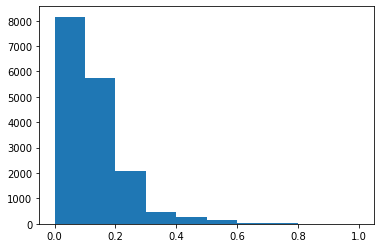

In [367]:
plt.hist(sents)

In [356]:
sents_1 = [i+1 for i in sents]

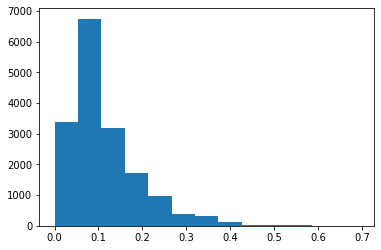

In [357]:
plt.hist(np.log(sents_1), bins = 13);

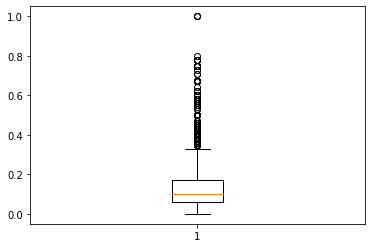

In [358]:
plt.boxplot(sents);

In [363]:
pd.Series(sents).sort_values()

8718     0.00
9331     0.00
8657     0.00
13538    0.00
13532    0.00
         ... 
5272     0.78
993      0.80
13649    1.00
5315     1.00
14876    1.00
Length: 16913, dtype: float64

0.7526754567492462

In [360]:
data = {'tweet':tweets['name_and_tweet'],'outage_sent':sents}

In [361]:
sent_df = pd.DataFrame(data)
sent_df.head()

,tweet,outage_sent
0,ttwn sf bay area power outage in cupertino bay...,0.33
1,san jose now weather alert flash flood watch i...,0.25
2,san jose now power outages in san francisco on...,0.18
3,san jose now power outage in fremont several i...,0.23
4,san jose now east bay power outages also affec...,0.20


In [362]:
sent_df.sort_values('outage_sent')

,tweet,outage_sent
8718,leah lavigne andddddd im back with an electric...,0.00
9331,glenn moses you get em sister love light and ...,0.00
8657,illiotti media inc lecheminduroi we nxt mea...,0.00
13538,oss lost pix of ghost from power_starz cleve...,0.00
13532,phil kalina stayhome electric lights are stil...,0.00
...,...,...
5272,detroit now dte energy power outage updates th...,0.78
993,los angeles now explosion at lacma causes powe...,0.80
13649,this power outage,1.00
5315,power outage,1.00


In [364]:
sent_0 = sent_df[sent_df['outage_sent']==0]

In [366]:
len(sent_0)

815

In [369]:
sent_df.loc[14876,'tweet']

'san antonio now storm update cps reports there are currently  power outages affecting  customers in the san antonio area'